## Loading Data

This block involves importing the necessary libraries and loading the datasets into Pandas dataframes.



In [1]:
import pandas as pd

# Load the datasets
deaths_df = pd.read_csv('time_series_covid19_deaths_US.csv')
vaccination_df = pd.read_csv('us_state_vaccinations.csv')


## Inspecting Initial Data

This step helps in getting an initial look at the data, checking for data completeness, and understanding which columns are available.



In [2]:
deaths_df.head(), deaths_df.columns, vaccination_df.head(), vaccination_df.columns


(        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
 0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
 1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
 2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
 3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
 4  84001009   US  USA    840  1009.0   Blount        Alabama             US   
 
          Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
 0  32.539527 -86.644082  ...     230     232     232     232     232     232   
 1  30.727750 -87.722071  ...     724     726     726     726     726     726   
 2  31.868263 -85.387129  ...     103     103     103     103     103     103   
 3  32.996421 -87.125115  ...     109     109     109     109     109     109   
 4  33.982109 -86.567906  ...     261     261     261     261     261     261   
 
    3/6/23  3/7/23  3/8/23  3/

## Aggregating Death Data

The assumption here is that the dataset's last column is the most recent. The data is grouped by state, and total deaths are calculated.



In [3]:
most_recent_date = deaths_df.columns[-1]  # Assuming the last column is the most recent date
deaths_aggregated = deaths_df.groupby('Province_State')[most_recent_date].sum().reset_index()
deaths_aggregated.columns = ['state', 'total_deaths']


## Processing Vaccination Data

It converts the 'date' column to datetime format, finds the latest date, and then extracts data for this date.



In [4]:
vaccination_df['date'] = pd.to_datetime(vaccination_df['date'])
latest_vaccination_date = vaccination_df['date'].max()
vaccination_latest = vaccination_df[vaccination_df['date'] == latest_vaccination_date]
vaccination_latest = vaccination_latest[['location', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']]


## Merging Data

This block combines the previously aggregated death data with the latest vaccination statistics by matching the state names.



In [5]:
combined_data = pd.merge(deaths_aggregated, vaccination_latest, left_on='state', right_on='location')
combined_data = combined_data[['state', 'total_deaths', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']]


## Visualizing the Data

Finally, the merged data is visualized using Seaborn and Matplotlib to create boxplots showing distributions of vaccination rates and total deaths.



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


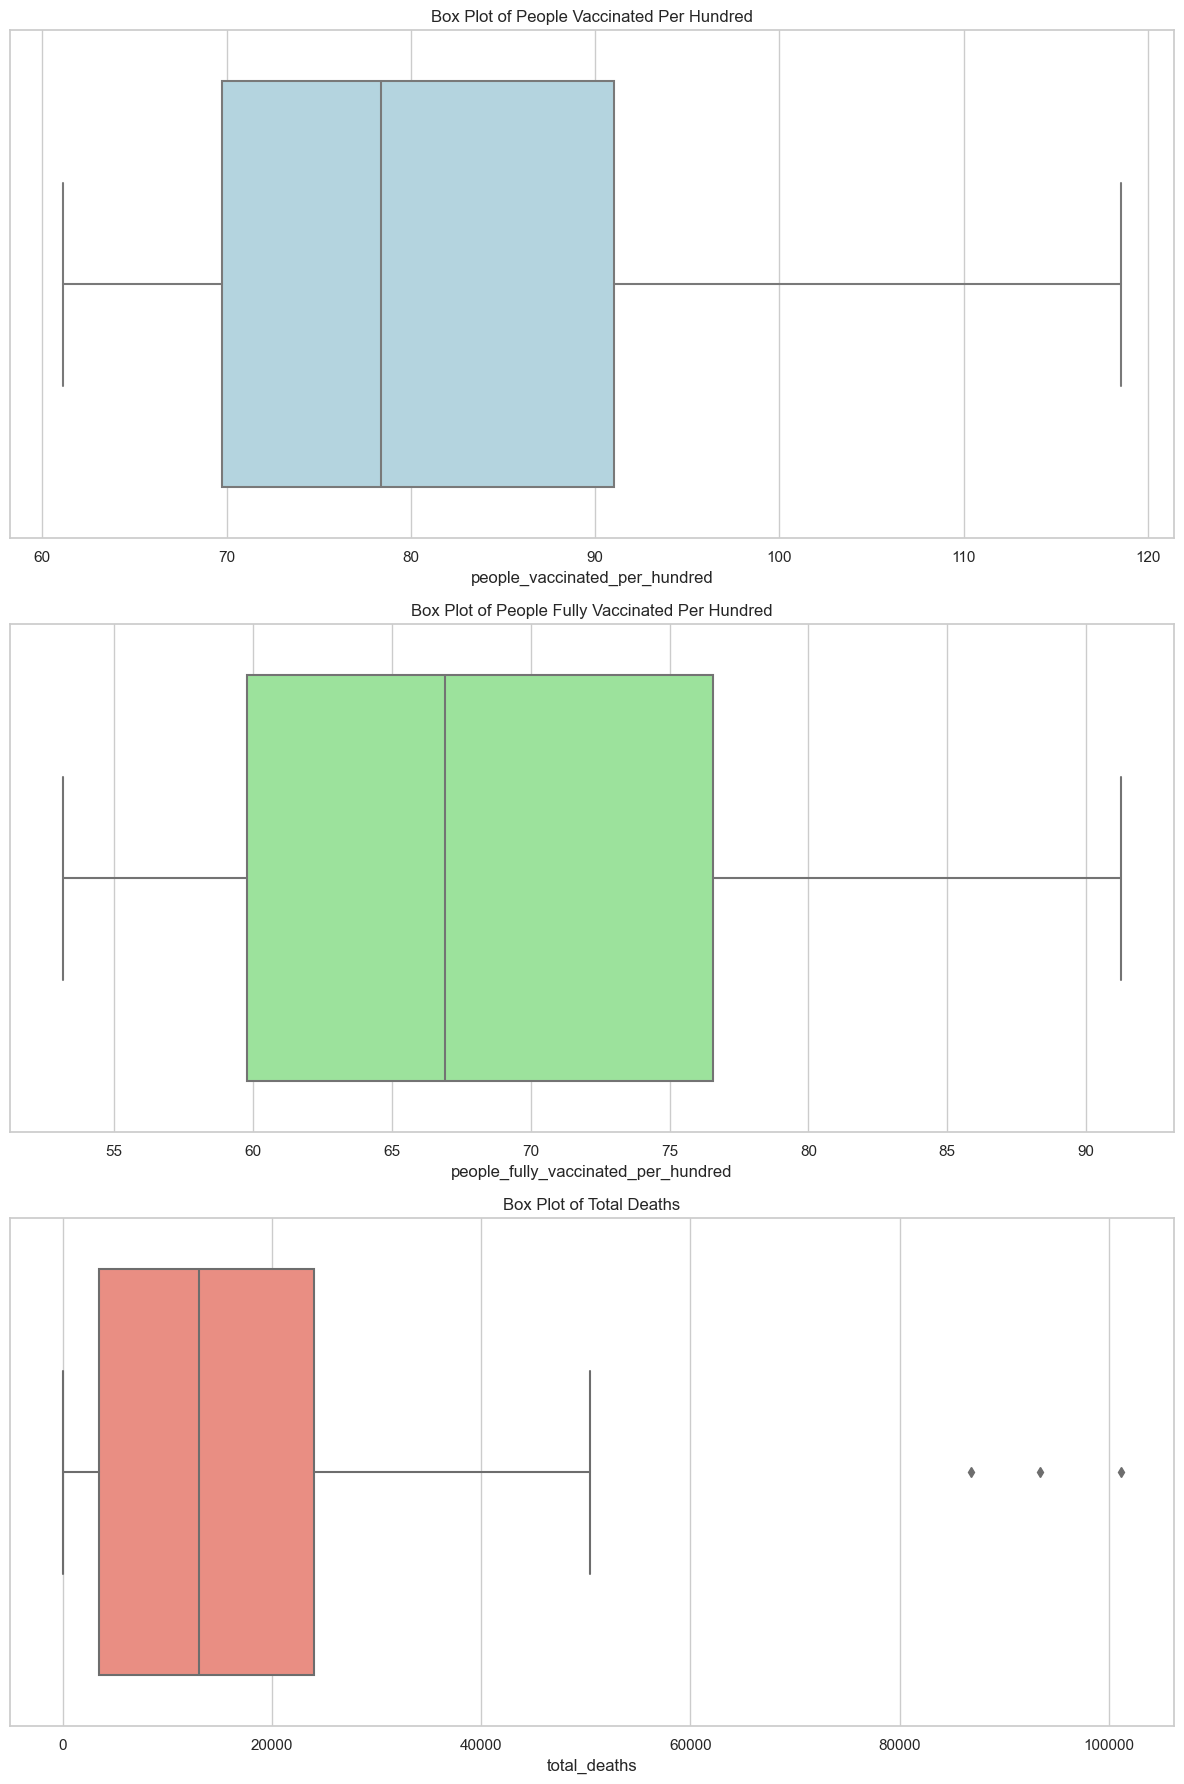

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
sns.boxplot(x=combined_data['people_vaccinated_per_hundred'], ax=ax[0], color='lightblue')
ax[0].set_title('Box Plot of People Vaccinated Per Hundred')
sns.boxplot(x=combined_data['people_fully_vaccinated_per_hundred'], ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of People Fully Vaccinated Per Hundred')
sns.boxplot(x=combined_data['total_deaths'], ax=ax[2], color='salmon')
ax[2].set_title('Box Plot of Total Deaths')
plt.tight_layout()
plt.show()


The boxplots illustrate the impact of vaccination efforts on the dataset. They display the distribution of people vaccinated with at least one dose, those fully vaccinated, and total deaths recorded. These visualizations offer insights into vaccination rates and mortality, suggesting the effectiveness of vaccination campaigns in mitigating COVID-19-related fatalities.






